# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [52]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [5]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
spaceship = spaceship.dropna()

In [7]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [8]:
features = spaceship[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

And also lets define our target.

In [9]:
target = spaceship['RoomService']  # Reemplaza 'TargetVariable' con el nombre de la columna que contiene el target


**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [11]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2883,28.0,0.0,0.0,0.0,0.0,0.0
4349,68.0,0.0,0.0,0.0,0.0,0.0
4072,55.0,802.0,0.0,155.0,4.0,337.0
6570,15.0,9.0,776.0,4.0,0.0,2.0
4767,19.0,0.0,3750.0,0.0,0.0,41.0


In [12]:
y_train.head()

2883      0.0
4349      0.0
4072    802.0
6570      9.0
4767      0.0
Name: RoomService, dtype: float64

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knn = KNeighborsRegressor()

Fit the model to your data.

In [15]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

Evaluate your model.

In [16]:
knn.score(X_test, y_test)

0.9655017676390772

In [17]:
y_test

5417    571.0
7439    868.0
651     269.0
824       0.0
2515      0.0
        ...  
1197      0.0
1578      0.0
1704      0.0
5920      0.0
2971      0.0
Name: RoomService, Length: 1322, dtype: float64

In [18]:
y_predict = knn.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

mse, mae, r2

(13237.495400907717, 28.228290468986387, 0.9655017676390772)

In [34]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2883,28.0,0.0,0.0,0.0,0.0,0.0
4349,68.0,0.0,0.0,0.0,0.0,0.0
4072,55.0,802.0,0.0,155.0,4.0,337.0
6570,15.0,9.0,776.0,4.0,0.0,2.0
4767,19.0,0.0,3750.0,0.0,0.0,41.0
...,...,...,...,...,...,...
6923,16.0,0.0,0.0,0.0,0.0,0.0
5367,34.0,0.0,1745.0,6.0,5.0,37.0
7146,50.0,0.0,0.0,0.0,0.0,0.0
817,55.0,280.0,0.0,444.0,0.0,0.0


In [24]:
y_pred_train = knn.predict(X_train)

In [40]:
pca = PCA(n_components = 1)
x_pca = pca.fit_transform(X_train)

In [41]:
x_pca

array([[-611.4940928 ],
       [-611.43769758],
       [-521.71191111],
       ...,
       [-611.46307543],
       [-614.38902239],
       [-611.52229041]])

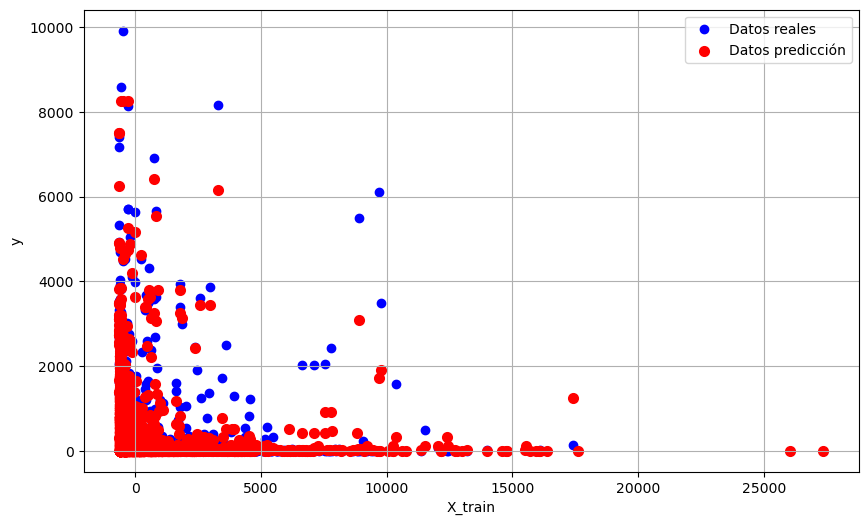

In [42]:
#gráfico para comparar los datos reales y los de la predicción
plt.figure(figsize=(10, 6))
plt.scatter(x_pca, y_train, color='blue', label='Datos reales')
plt.scatter(x_pca, y_pred_train, color='red', linewidth=2, label='Datos predicción')
plt.xlabel('X_train')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
pca = PCA(n_components = 0.80)
x_pca = pca.fit_transform(X_train)

In [47]:
x_pca_test = pca.transform(X_test)

In [48]:
knn_pca = KNeighborsRegressor()
knn_pca.fit(x_pca, y_train)

KNeighborsRegressor()

In [49]:
y_predict_pca = knn_pca.predict(x_pca_test)

In [50]:
mse_pca = mean_squared_error(y_test, y_predict_pca)
mae_pca = mean_absolute_error(y_test, y_predict_pca)
r2_pca = r2_score(y_test, y_predict_pca)

mse_pca, mae_pca, r2_pca

(180252.0180030257, 173.56898638426628, 0.5302452758421947)

In [53]:
#estandarizamos el modelo
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [54]:
knn_standardized = KNeighborsRegressor()
knn_standardized.fit(X_train_standardized, y_train)

KNeighborsRegressor()

In [55]:
y_predict_standardized = knn_standardized.predict(X_test_standardized)

In [56]:
mse_standardized = mean_squared_error(y_test, y_predict_standardized)
mae_standardized = mean_absolute_error(y_test, y_predict_standardized)
r2_standardized = r2_score(y_test, y_predict_standardized)

mse_standardized, mae_standardized, r2_standardized

(7572.161815431166, 27.552193645990922, 0.9802661916116444)

In [58]:
#normalizamos el modelo
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [59]:
knn_normalized = KNeighborsRegressor()
knn_normalized.fit(X_train_normalized, y_train)

KNeighborsRegressor()

In [60]:
y_predict_normalized = knn_normalized.predict(X_test_normalized)

In [61]:
mse_normalized = mean_squared_error(y_test, y_predict_normalized)
mae_normalized = mean_absolute_error(y_test, y_predict_normalized)
r2_normalized = r2_score(y_test, y_predict_normalized)

mse_normalized, mae_normalized, r2_normalized

(8130.16771558245, 31.444024205748864, 0.9788119726208778)

In [ ]:
#el modelo normalizado sería el mejor modelo

(13237.495400907717, 28.228290468986387, 0.9655017676390772)


**Congratulations, you have just developed your first Machine Learning model!**